In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

C:\Users\Hyeon\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

df = pd.read_csv('DSA_features.csv')

In [3]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [4]:
df.shape

(9120, 272)

In [5]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_ymag_std', 'LL_ymag_skew', 'LL_zmag_mean', 'LL_zmag_max',
       'LL_zmag_min', 'LL_zmag_var', 'LL_zmag_std', 'LL_zmag_skew', 'activity',
       'people'],
      dtype='object', length=272)

In [6]:
# 결측치 홗인

df.isnull().values.any()

False

In [7]:
# people 원핫 인코딩

df = pd.get_dummies(df, columns=['people'])



In [8]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_zmag_skew', 'activity', 'people_p1', 'people_p2', 'people_p3',
       'people_p4', 'people_p5', 'people_p6', 'people_p7', 'people_p8'],
      dtype='object', length=279)

In [9]:
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [10]:
# 데이터 필터링
data = df[df['activity'].isin(['lyingRigh', 'lyingBack', 'standing'])]

In [11]:
data['activity'].value_counts()

activity
standing     480
lyingBack    480
lyingRigh    480
Name: count, dtype: int64

In [12]:
# 'lyingRigh'와 'lyingBack'를 'lying'로 통합
data['activity'] = data['activity'].replace({'lyingRigh': 'lying', 'lyingBack': 'lying'})


C:\Users\Hyeon\AppData\Local\Temp\ipykernel_24264\3037848305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['activity'] = data['activity'].replace({'lyingRigh': 'lying', 'lyingBack': 'lying'})


In [13]:
data['activity'].value_counts()

activity
lying       960
standing    480
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# 'label' 컬럼을 숫자로 변환
data['activity'] = label_encoder.fit_transform(data['activity'])

# 'people' 컬럼을 숫자로 변환
#data['people'] = label_encoder.fit_transform(data['people'])

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_24264\3276854293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['activity'] = label_encoder.fit_transform(data['activity'])


In [15]:
# 0이 정상치, 1이 이상치
data['activity'].value_counts()

activity
0    960
1    480
Name: count, dtype: int64

In [16]:
# data['people'].value_counts()

In [17]:
LABELS = ["lying","standing"]

C:\Users\Hyeon\AppData\Local\Temp\ipykernel_24264\610269827.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['activity'], sort = True)


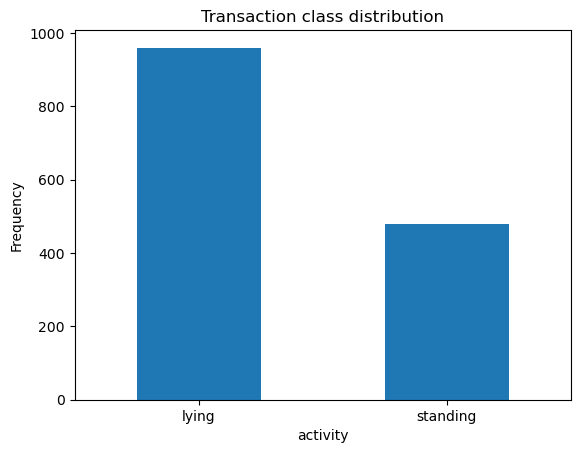

In [18]:
count_classes = pd.value_counts(data['activity'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("activity")
plt.ylabel("Frequency");

In [19]:
frauds = data[data.activity == 1]
normal = data[data.activity == 0]

In [20]:
frauds.shape


(480, 279)

In [21]:
normal.shape

(960, 279)

In [22]:
normal.head()

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_zmag_skew,activity,people_p1,people_p2,people_p3,people_p4,people_p5,people_p6,people_p7,people_p8
960,-4.834646,-4.7185,-4.9049,0.001124,0.033529,0.632141,-0.501018,-0.41744,-0.59561,0.001016,...,-0.193301,0,True,False,False,False,False,False,False,False
961,-4.780810,-4.5850,-4.8833,0.003948,0.062835,1.052880,-0.480601,-0.40372,-0.63184,0.001297,...,-0.372381,0,True,False,False,False,False,False,False,False
962,-4.804400,-4.7037,-4.8755,0.001482,0.038496,0.735226,-0.493925,-0.42616,-0.59561,0.000863,...,0.185587,0,True,False,False,False,False,False,False,False
963,-4.750563,-4.5696,-4.8977,0.004447,0.066683,0.710263,-0.437358,-0.30877,-0.55225,0.003587,...,-0.145321,0,True,False,False,False,False,False,False,False
964,-4.774916,-4.6741,-4.8457,0.001080,0.032868,0.324779,-0.459456,-0.38900,-0.53714,0.001059,...,-0.026271,0,True,False,False,False,False,False,False,False


In [23]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

# 훈련 데이터에서는 0 (정상) 데이터만 남김, 이때, Class(레이블) 은 0만 남으므로 따로 남길 필요 없음
X_train = X_train[X_train.activity == 0]
X_train = X_train.drop(['activity'], axis=1)
X_train = X_train.astype('float32')

# 테스트 데이터에서는 0(정상), 1(비정상) 데이터 모두 남김, 이때, Class(레이블) 은 0, 1 모두 필요하므로 y_test로 따로 정리
y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)
X_test = X_test.astype('float32')

# 데이터 프레임에서 numpy 배열로 전환
X_train = X_train.values
X_test = X_test.values

X_train.shape

(763, 278)

In [ ]:
##################################3

In [24]:
### 1. Linear AE

In [ ]:
###############################

In [25]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='linear')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='linear')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='linear')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder1 = Model(inputs=input_layer, outputs=decoded)
autoencoder1.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [26]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder1.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step - loss: 5.6310 - val_loss: 5.5861
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.6228 - val_loss: 5.5540
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.5385 - val_loss: 5.5193
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.5029 - val_loss: 5.4810
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.5004 - val_loss: 5.4387
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.4311 - val_loss: 5.3926
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.3663 - val_loss: 5.3438
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.3008 - val_loss: 5.2937
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.2836 - val_loss: 5.2441
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 5.2074 - val_loss: 5.1962
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.2051 - val_loss: 5.1510
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.1373 - val_loss: 5.1093


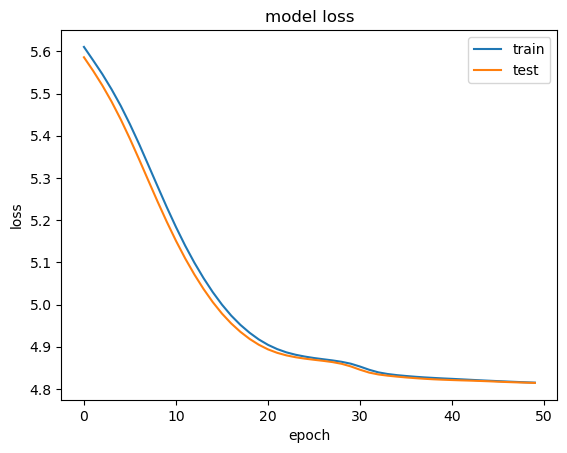

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [59]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder1.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.849034,0.315972
std,0.266305,0.465711
min,4.462860,0.000000
25%,4.569002,0.000000
50%,4.856853,0.000000
75%,5.079823,1.000000
max,5.569838,1.000000


In [61]:
error_df

,reconstruction_error,true_class
648,5.293572,1
1085,4.725294,0
1028,5.267427,0
545,5.116043,1
1108,4.705896,0
...,...,...
1847,4.682135,0
745,5.083236,1
1905,4.752600,0
973,4.560282,0


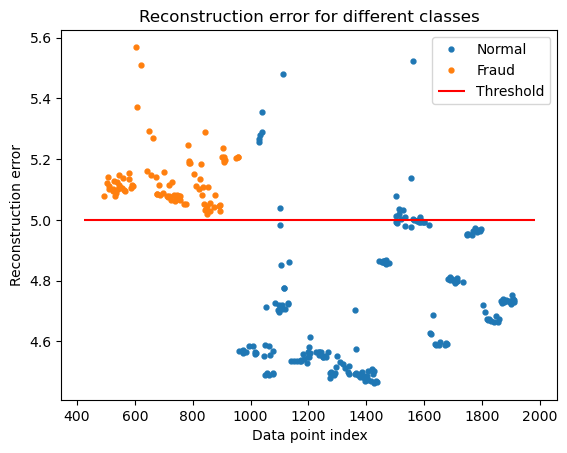

In [71]:
threshold = 5

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

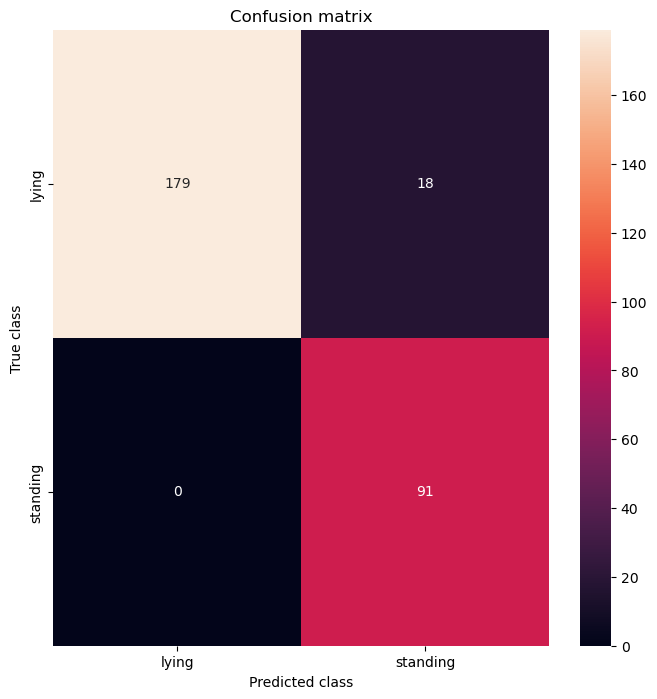

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       197
           1       0.83      1.00      0.91        91

    accuracy                           0.94       288
   macro avg       0.92      0.95      0.93       288
weighted avg       0.95      0.94      0.94       288



In [77]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [ ]:
######################################

In [ ]:
### 2. Non-Linear AE

In [ ]:
##################################3

In [81]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder2 = Model(inputs=input_layer, outputs=decoded)
autoencoder2.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [83]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder2.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - loss: 5.5539 - val_loss: 5.5847
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.5667 - val_loss: 5.5689
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.5718 - val_loss: 5.5495
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.5751 - val_loss: 5.5257
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 5.5635 - val_loss: 5.4967
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.4777 - val_loss: 5.4632
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4747 - val_loss: 5.4257
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.4493 - val_loss: 5.3846
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.4302 - val_loss: 5.3410
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 5.3601 - val_loss: 5.2959
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.2628 - val_loss: 5.2509
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 5.2363 - val_loss: 5.2069


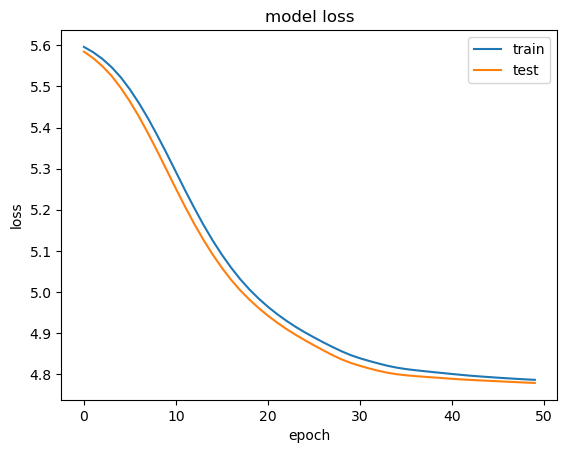

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [87]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder2.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.833601,0.315972
std,0.281067,0.465711
min,4.404555,0.000000
25%,4.559228,0.000000
50%,4.845355,0.000000
75%,5.099404,1.000000
max,5.599405,1.000000


In [89]:
error_df

,reconstruction_error,true_class
648,5.294382,1
1085,4.733272,0
1028,5.239593,0
545,5.112347,1
1108,4.715411,0
...,...,...
1847,4.683255,0
745,5.106838,1
1905,4.754631,0
973,4.515593,0


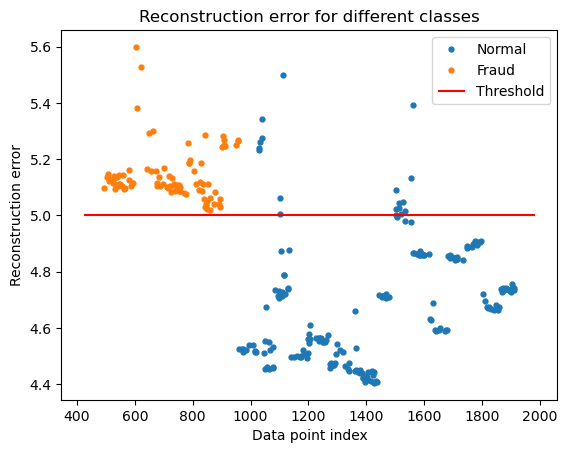

In [95]:
threshold = 5

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

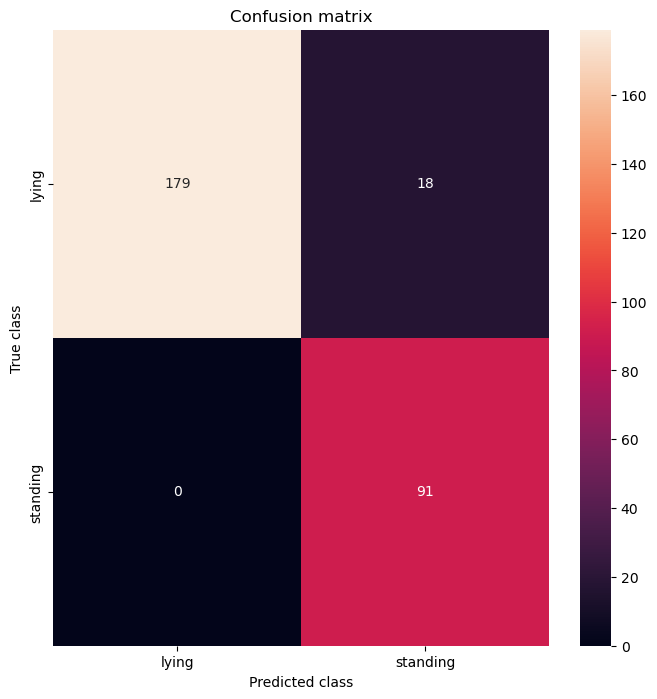

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       197
           1       0.83      1.00      0.91        91

    accuracy                           0.94       288
   macro avg       0.92      0.95      0.93       288
weighted avg       0.95      0.94      0.94       288



In [97]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [ ]:
#########################################

In [ ]:
##3. denoising AE

In [ ]:
####################################

In [30]:
# 기존 데이터프레임 df에서 컬럼 이름을 가져옵니다. (activity 컬럼 제외)
column_names = df.drop(['activity'], axis=1).columns.tolist()

# 데이터셋을 DataFrame으로 전환
X_train_df = pd.DataFrame(X_train, columns=column_names)

def add_noise_except_columns(data, columns_to_exclude, noise_factor=0.5):
    data_noise = data.copy()
    num = data.shape[0]  # 데이터의 행 수
    for col in data.columns:
        if col not in columns_to_exclude:
            # columns_to_exclude에 없는 컬럼에만 노이즈를 추가합니다.
            data_noise[col] = data_noise[col] + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=num)
    return data_noise

# 노이즈를 추가하지 않을 컬럼 목록을 정의
excluded_columns = ['people_p1', 'people_p2', 'people_p3', 'people_p4', 'people_p5', 'people_p6', 'people_p7', 'people_p8']

# 노이즈 추가 함수 호출
X_train_noise_df = add_noise_except_columns(X_train_df, excluded_columns, noise_factor=0.5)

# 필요하다면, 다시 numpy 배열로 전환
X_train_noise = X_train_noise_df.values



In [46]:
# 데이터셋을 DataFrame으로 전환
X_test_df = pd.DataFrame(X_test, columns=column_names)

# 노이즈를 추가하지 않을 컬럼 목록을 정의
excluded_columns = ['people_p1', 'people_p2', 'people_p3', 'people_p4', 'people_p5', 'people_p6', 'people_p7', 'people_p8']

# 노이즈 추가 함수 호출
X_test_noise_df = add_noise_except_columns(X_test_df, excluded_columns, noise_factor=0.2)

# 필요하다면, 다시 numpy 배열로 전환
X_test_noise = X_test_noise_df.values

In [31]:
df.columns

Index(['T_xacc_mean', 'T_xacc_max', 'T_xacc_min', 'T_xacc_var', 'T_xacc_std',
       'T_xacc_skew', 'T_yacc_mean', 'T_yacc_max', 'T_yacc_min', 'T_yacc_var',
       ...
       'LL_zmag_skew', 'activity', 'people_p1', 'people_p2', 'people_p3',
       'people_p4', 'people_p5', 'people_p6', 'people_p7', 'people_p8'],
      dtype='object', length=279)

In [33]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder3 = Model(inputs=input_layer, outputs=decoded)
autoencoder3.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


In [35]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder3.fit(X_train_noise, X_train, 
                          epochs=50, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 5.6515 - val_loss: 5.6176
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.5767 - val_loss: 5.5936
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5754 - val_loss: 5.5710
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.6045 - val_loss: 5.5483
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5471 - val_loss: 5.5242
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4801 - val_loss: 5.4980
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4774 - val_loss: 5.4694
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.4538 - val_loss: 5.4384
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.3974 - val_loss: 5.4051
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.4006 - val_loss: 5.3695
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 5.4037 - val_loss: 5.3317
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.2884 - val_loss: 5.2920
E

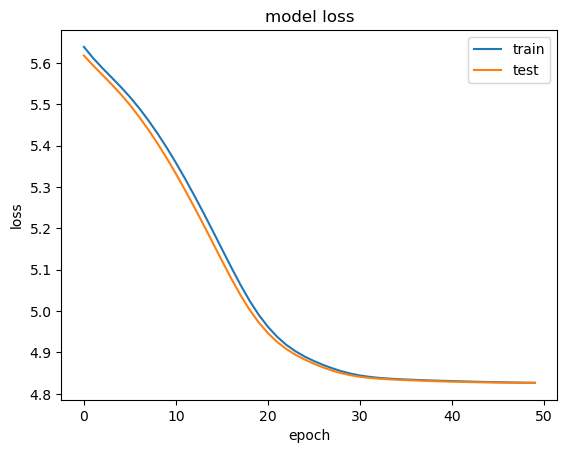

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [49]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder3.predict(X_test_noise)
mse = np.mean(np.power(X_test_noise - predictions, 2), axis=1)

error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

error_df.describe()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


,reconstruction_error,true_class
count,288.000000,288.000000
mean,4.909444,0.315972
std,0.279351,0.465711
min,4.359682,0.000000
25%,4.646034,0.000000
50%,4.939812,0.000000
75%,5.141546,1.000000
max,5.576300,1.000000


In [43]:
error_df

,reconstruction_error,true_class
648,5.523093,1
1085,5.099705,0
1028,5.270337,0
545,5.255108,1
1108,4.875021,0
...,...,...
1847,4.960879,0
745,5.420005,1
1905,4.993416,0
973,4.487997,0


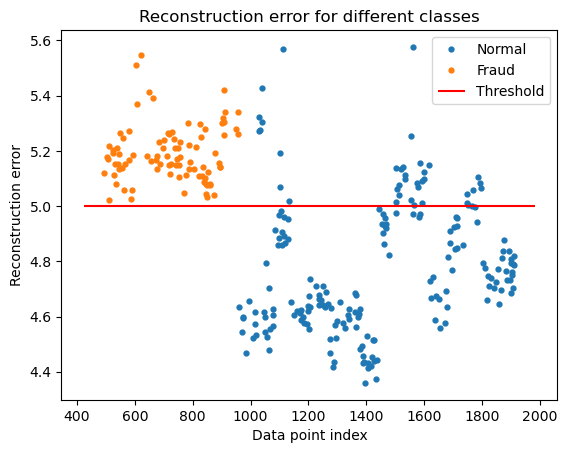

In [50]:
threshold = 5

groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

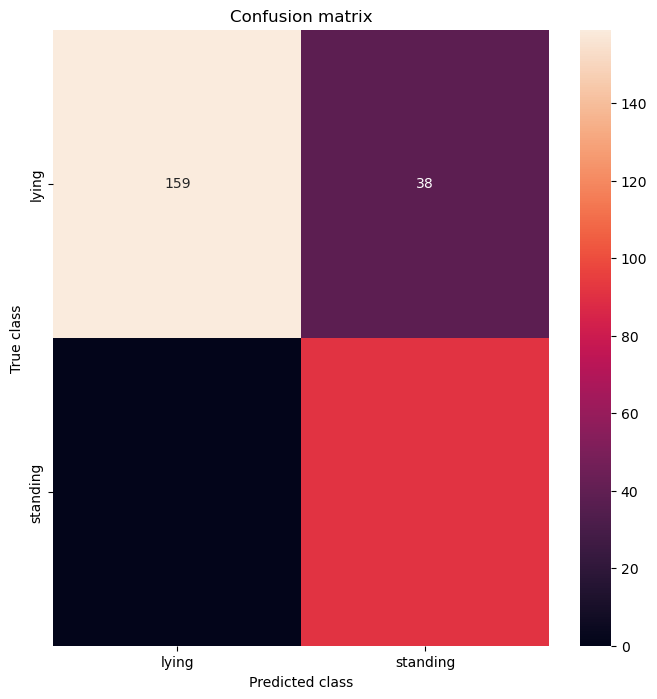

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       197
           1       0.71      1.00      0.83        91

    accuracy                           0.87       288
   macro avg       0.85      0.90      0.86       288
weighted avg       0.91      0.87      0.87       288



In [51]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))